In [1]:
# same as pre_process but remove lotarea, bedrooms, and central ac yes no
import janitor as jn
import pandas as pd
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
file_path =  r"C:\Users\jason\OneDrive\Documents\Jason\NYC Data Science Academy\projects\machine_learning\ghub_work_area\work_area\jason\data\train.csv"

import_list = ['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Alley','LotShape', 'Neighborhood', 'Condition1', 
              'Condition2', 'BldgType', 'HouseStyle','OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 
              'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 
              'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2','BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'CentralAir', 
              'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 
              'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces',
              'FireplaceQu', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch','ScreenPorch', 'YrSold', 
              'SaleType', 'SaleCondition','Electrical',"HeatingQC","Fireplaces", "FireplaceQu", "BsmtQual", "BsmtFinType1", 
              "BsmtFinType2", 'SalePrice']


# def read_file(column_list, file_path):
 #   """
  #  This function reads in the training data set, standardizes columns to be all lowercases and
  #  replacing spaces with underscores.
    
  #  It also selects the specified list of columns to read-in - after standardization.
     
 #   :param column_list: list of features to read in
 #   :return: dataframe with columns subsetted and standardized
 #   """
initial_df = pd.read_csv(file_path, header=0, usecols=import_list, index_col=0)
cleaned_df = jn.clean_names(initial_df)
len(cleaned_df.columns.to_list())
 #   return initial_df

54

In [3]:
# house_df = read_file(column_list=import_list, file_path=file_path)
cleaned_df.head(5)

mssubclass mszoning  lotfrontage  lotarea alley lotshape neighborhood  \
Id                                                                          
1           60       RL         65.0     8450   NaN      Reg      CollgCr   
2           20       RL         80.0     9600   NaN      Reg      Veenker   
3           60       RL         68.0    11250   NaN      IR1      CollgCr   
4           70       RL         60.0     9550   NaN      IR1      Crawfor   
5           60       RL         84.0    14260   NaN      IR1      NoRidge   

   condition1 condition2 bldgtype  ... fireplacequ  wooddecksf  openporchsf  \
Id                                 ...                                        
1        Norm       Norm     1Fam  ...         NaN           0           61   
2       Feedr       Norm     1Fam  ...          TA         298            0   
3        Norm       Norm     1Fam  ...          TA           0           42   
4        Norm       Norm     1Fam  ...          Gd           0           35   
5        Norm       Norm     1Fam  ...          TA         192           84   

    enclosedporch  3ssnporch screenporch yrsold saletype  salecondition  \
Id                                                                        
1               0          0           0   2008       WD         Normal   
2               0          0           0   2007       WD         Normal   
3               0          0           0   2008       WD         Normal   
4             272          0           0   2006       WD        Abnorml   
5               0          0           0   2008       WD         Normal   

   saleprice  
Id            
1     208500  
2     181500  
3     223500  
4     140000  
5     250000  

[5 rows x 54 columns]

In [4]:
 ## bad amenities
no_central_ac = cleaned_df['centralair'].isin(['N']).map({False: 0, True:1}) 

In [5]:
bad_electrical = cleaned_df['electrical'].isin(['Mix', 'FuseP', 'FuseF', 'FuseA']).map({False: 0, True:1})
bad_electrical

Id
1       0
2       0
3       0
4       0
5       0
       ..
1456    0
1457    0
1458    0
1459    1
1460    0
Name: electrical, Length: 1460, dtype: int64

In [6]:
#no_fireplace
no_fireplace = cleaned_df["fireplaces"] == 0
no_fireplace = no_fireplace.map({False: 0, True: 1})

In [7]:
# positive_amenities
excl_heating = cleaned_df["heatingqc"].isin(["Ex"]).map({False: 0, True:1})

In [8]:
# good basement
excl_bsmt = cleaned_df["bsmtqual"].isin(["Ex"]).map({False: 0, True:1})
excl_bsmt.sum()

121

In [9]:
# basement has GLQ in either 
bsmt_gd_lvg = (cleaned_df["bsmtfintype1"].isin(["GLQ"]) | cleaned_df["bsmtfintype2"].isin(["GLQ"])).map({False: 0, True:1})
bsmt_gd_lvg.sum()

432

In [10]:
cleaned_df.columns

Index(['mssubclass', 'mszoning', 'lotfrontage', 'lotarea', 'alley', 'lotshape',
       'neighborhood', 'condition1', 'condition2', 'bldgtype', 'housestyle',
       'overallqual', 'overallcond', 'yearbuilt', 'yearremodadd',
       'exterior1st', 'exterior2nd', 'masvnrtype', 'masvnrarea', 'bsmtqual',
       'bsmtcond', 'bsmtexposure', 'bsmtfintype1', 'bsmtfinsf1',
       'bsmtfintype2', 'bsmtfinsf2', 'bsmtunfsf', 'totalbsmtsf', 'heatingqc',
       'centralair', 'electrical', '1stflrsf', '2ndflrsf', 'lowqualfinsf',
       'grlivarea', 'bsmtfullbath', 'bsmthalfbath', 'fullbath', 'halfbath',
       'bedroomabvgr', 'kitchenabvgr', 'kitchenqual', 'totrmsabvgrd',
       'fireplaces', 'fireplacequ', 'wooddecksf', 'openporchsf',
       'enclosedporch', '3ssnporch', 'screenporch', 'yrsold', 'saletype',
       'salecondition', 'saleprice'],
      dtype='object')

In [11]:
# to adjust for houses with bsmtsf larger than 2500 not showing any lift in SalePrice
# two outliers with 3100 sf and 5000-ish sf not conveying any increase in price 
mask = cleaned_df["totalbsmtsf"] > 2500
cleaned_df.loc[mask, "totalbsmtsf"] = 2500

In [12]:
total_bldg_sf = cleaned_df[["totalbsmtsf", "1stflrsf", "2ndflrsf"]].sum(axis = "columns")
total_baths = cleaned_df["fullbath"]  + cleaned_df["halfbath"]/ 2 + cleaned_df["bsmtfullbath"] + cleaned_df["bsmthalfbath"] / 2

In [12]:
# similarly - houses with more than 4.5 baths do not show any lift in SalePrice
# but 1 to 4.5 is a steady trend
# mask = total_baths > 4.5
# total_baths.loc[mask] = 4.5
# THIS LOWERED PERFORMANCE A TAD SO REMOVING

In [13]:
total_baths.value_counts()

2.0    456
2.5    295
1.0    228
3.0    186
3.5    144
1.5    129
4.0     13
4.5      7
5.0      1
6.0      1
dtype: int64

In [14]:
top_3_nbrhd = cleaned_df["neighborhood"].isin(["NridgHt", "NoRidge", "StoneBr"]).map({False: 0, True: 1})
btm_5_nbrhd = cleaned_df["neighborhood"].isin(["MeadowV", "IDOTRR", "BrDale", "OldTown", "Edwards"]).map({False: 0, True: 1})

In [15]:
ktch_groups = cleaned_df["kitchenqual"].map({"TA": "ktch_okay", "Fa": "ktch_okay", "Gd": "ktch_good", "Ex": "kitch_topnotch"})
ktch_dummies = pd.get_dummies(data=ktch_groups).drop("ktch_okay", axis="columns")


In [16]:
(cleaned_df["condition1"].isin(["PosA", "PosN"]) | cleaned_df["condition2"].isin(["PosA", "PosN"])).sum()
# passing on for the moment b/c only in 28 out of the entire ~1500 dataset

28

In [17]:
# Fireplaces that are Excellent, Good or Typical/TA 
good_frplc = cleaned_df["fireplacequ"].isin(["Ex", "Gd", "TA"]).map({False: 0, True: 1})

In [18]:
old_home = cleaned_df["yrsold"] != cleaned_df["yearbuilt"]
remodeled =  cleaned_df["yearbuilt"] != cleaned_df["yearremodadd"]
old_home = old_home.map({False: 0, True: 1})
remodeled = remodeled.map({False: 0, True: 1})
remodeled.sum() #696 remodeled homes

696

In [19]:
homeage = cleaned_df["yrsold"] - cleaned_df["yearbuilt"]
remodelage = cleaned_df["yrsold"] - cleaned_df["yearremodadd"]

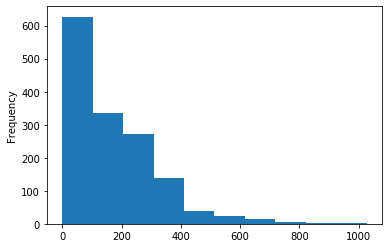

In [20]:
outside_sf = cleaned_df[["wooddecksf", "openporchsf", "3ssnporch", "screenporch"]].sum(axis="columns")
outside_sf.plot.hist()

In [21]:
outside_space = outside_sf == 0
outside_space = outside_space.map({False: 0, True: 1})

In [68]:
pd.concat([excl_heating, excl_bsmt, ktch_dummies, bsmt_gd_lvg, good_frplc], axis = "columns").sum(axis="columns").describe()

count    1460.000000
mean        1.847260
std         1.489497
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         5.000000
dtype: float64

In [69]:
good_ament_ct = pd.concat([excl_heating, excl_bsmt, ktch_dummies, bsmt_gd_lvg, good_frplc], axis = "columns").sum(axis="columns")

In [70]:
pd.concat([no_central_ac, no_fireplace, bad_electrical], axis="columns").sum(axis="columns").describe()

count    1460.000000
mean        0.623288
std         0.728735
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         3.000000
dtype: float64

In [72]:
bad_ament_ct = pd.concat([no_central_ac, no_fireplace, bad_electrical], axis="columns").sum(axis="columns")

In [26]:
# pd.concat([top_3_nbrhd, excl_heating, excl_bsmt, ktch_dummies, bsmt_gd_lvg, good_frplc], axis = "columns")
top_3_nbrhd.head() # index is id
excl_heating.head() # index is id
excl_bsmt # index is id
bsmt_gd_lvg # index is id
good_frplc # index is id
ktch_dummies

kitch_topnotch  ktch_good
Id                             
1                  0          1
2                  0          0
3                  0          1
4                  0          1
5                  0          1
...              ...        ...
1456               0          0
1457               0          0
1458               0          1
1459               0          1
1460               0          0

[1460 rows x 2 columns]

In [27]:
ktch_dummies

kitch_topnotch  ktch_good
Id                             
1                  0          1
2                  0          0
3                  0          1
4                  0          1
5                  0          1
...              ...        ...
1456               0          0
1457               0          0
1458               0          1
1459               0          1
1460               0          0

[1460 rows x 2 columns]

In [73]:
y = cleaned_df["saleprice"]
X = pd.concat([cleaned_df[["overallqual"]], total_bldg_sf, total_baths, remodelage, outside_sf, good_ament_ct, bad_ament_ct, top_3_nbrhd, btm_5_nbrhd], 
    axis="columns")
X.columns = ["overallqual" ,"total_bldg_sf", "total_baths", "remodel_age", "outside_sf", "good_amen_ct", "bad_ament_ct", "top_3_nbrhd", "btm_5_nbrhd"]

In [74]:
X.sample(5)


overallqual  total_bldg_sf  total_baths  remodel_age  outside_sf  \
Id                                                                       
44              5           1876          2.0           28         145   
1429            5           1592          2.0           18           0   
531             6           2970          3.0           19         224   
92              5           2470          1.0           45           0   
1021            4           2264          2.5            3         316   

      good_amen_ct  bad_ament_ct  top_3_nbrhd  btm_5_nbrhd  
Id                                                          
44               0             1            0            0  
1429             2             0            0            1  
531              3             0            0            0  
92               0             1            0            0  
1021             3             1            0            1

In [75]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42)

In [76]:
from sklearn.linear_model import HuberRegressor, LinearRegression
from sklearn.ensemble import RandomForestRegressor

hr = HuberRegressor()
hr.fit(X=X_train, y=y_train)
print(hr.score(X=X_train, y=y_train))
print(hr.score(X=X_test, y=y_test))

0.78875537699455
0.7980659561349834


In [77]:
lr = LinearRegression()
lr.fit(X=X_train, y=y_train)
print(lr.score(X=X_train, y=y_train))
print(lr.score(X=X_test, y=y_test))

0.8134658455277483
0.8406647679787449


In [78]:
y_train_log = np.log(y_train)
y_test_log = np.log(y_test)

In [79]:
lr_log = LinearRegression()
lr_log.fit(X=X_train, y=y_train_log)
print(lr_log.score(X=X_train, y=y_train_log))
print(lr_log.score(X=X_test, y=y_test_log))


0.851452654030041
0.887552721922634


In [80]:
rfr = RandomForestRegressor(random_state=42, n_estimators=100)
rfr.fit(X_train, y_train)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [81]:
rfr.score(X_test, y_test)

0.8839901264148308

In [82]:
# using RandomForest to determine feature importance 
for col, val in sorted(
    zip(
        X_train.columns,
        rfr.feature_importances_,
    ),
    key=lambda x: x[1],
    reverse=True
):
    print(f"{col:10}{val:10.3f}")


total_bldg_sf     0.425
overallqual     0.397
good_amen_ct     0.045
total_baths     0.040
remodel_age     0.039
outside_sf     0.026
top_3_nbrhd     0.011
btm_5_nbrhd     0.011
bad_ament_ct     0.006


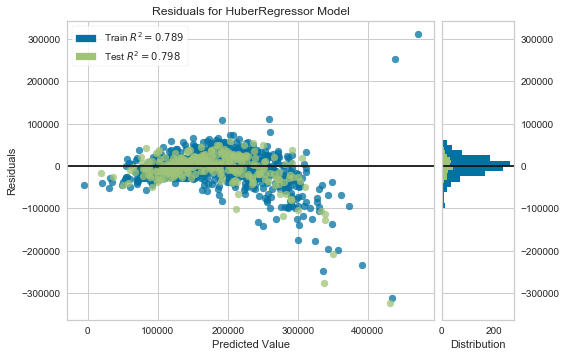

In [83]:
from yellowbrick.regressor import ResidualsPlot
rpv = ResidualsPlot(hr)
rpv.fit(X=X_train, y=y_train)
rpv.score(X=X_test, y=y_test)
rpv.poof()


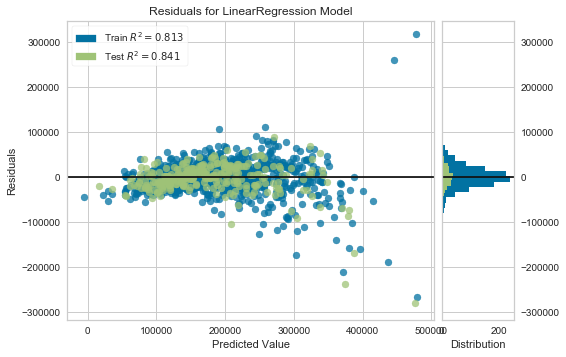

In [84]:
rpv = ResidualsPlot(lr)
rpv.fit(X=X_train, y=y_train)
rpv.score(X=X_test, y=y_test)
rpv.poof()

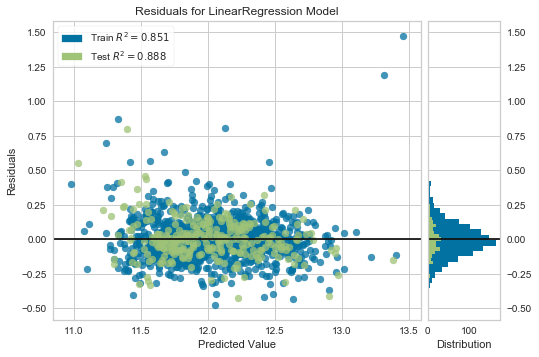

In [85]:

rpv = ResidualsPlot(lr_log)
rpv.fit(X=X_train, y=y_train_log)
rpv.score(X=X_test, y=y_test_log)
rpv.poof()

In [86]:
import statsmodels.api as sm
X_add_constant = sm.add_constant(X_train)
ols = sm.OLS(y_train_log, X_add_constant)
ans = ols.fit()
print(ans.summary())

OLS Regression Results                            
Dep. Variable:              saleprice   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     737.5
Date:                Mon, 24 Feb 2020   Prob (F-statistic):               0.00
Time:                        00:15:44   Log-Likelihood:                 554.76
No. Observations:                1168   AIC:                            -1090.
Df Residuals:                    1158   BIC:                            -1039.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            11.0321      0.034    328.731      0.000      10.966     

In [87]:
import statsmodels.api as sm
X_add_constant = sm.add_constant(X_train)
ols = sm.OLS(y_train, X_add_constant)
ans = ols.fit()
print(ans.summary())

OLS Regression Results                            
Dep. Variable:              saleprice   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     561.1
Date:                Mon, 24 Feb 2020   Prob (F-statistic):               0.00
Time:                        00:15:52   Log-Likelihood:                -13822.
No. Observations:                1168   AIC:                         2.766e+04
Df Residuals:                    1158   BIC:                         2.771e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.754e+04   7438.683     -3.702      0.000   -4.21e+04   -1

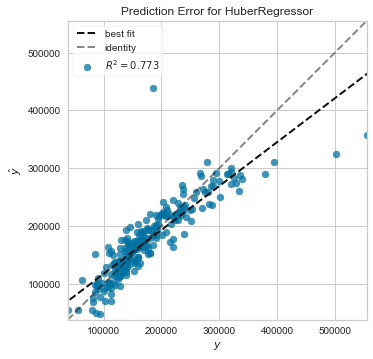

In [88]:
from yellowbrick.regressor import prediction_error

visualizer = prediction_error(hr, X_train, y_train)

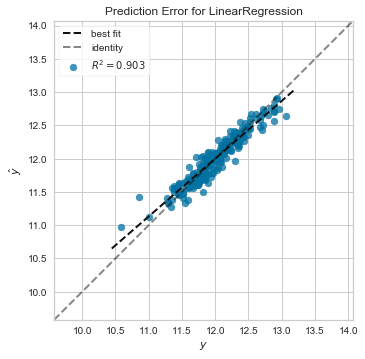

In [89]:
visualizer = prediction_error(lr_log, X_train, y_train_log)

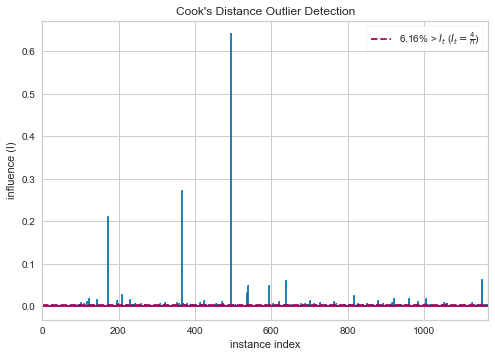

In [90]:
from yellowbrick.regressor import cooks_distance

cd_visualizer = cooks_distance(X=X_train, y=y_train)

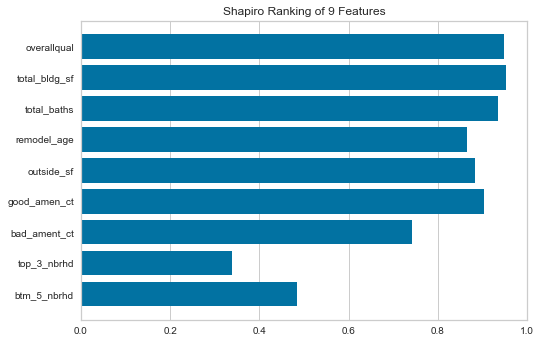

In [91]:
from yellowbrick.features import Rank1D

ft_rank_visualizer = Rank1D(algorithm='shapiro')
ft_rank_visualizer.fit(X=X_train, y=y_train_log)
ft_rank_visualizer.transform(X=X_train)
ft_rank_visualizer.show()

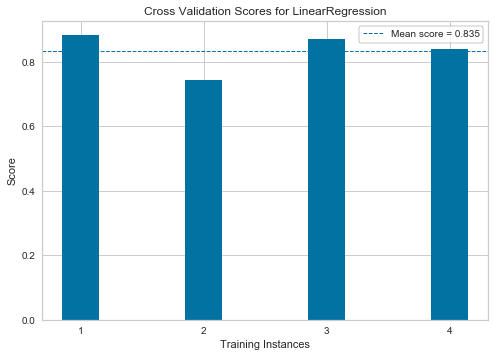

In [92]:
# Cross Validation
from sklearn.model_selection import KFold

from yellowbrick.model_selection import CVScores

# Instantiate the KFold settings
cv = KFold(n_splits=4, random_state=42)

cv_visualizer = CVScores(model=lr_log, cv=cv, scoring="r2")

cv_visualizer.fit(X=X_train, y=y_train_log) # fit data into visualizer 
cv_visualizer.poof()



In [93]:
from sklearn import preprocessing
std = preprocessing.StandardScaler()
X_train_std = std.fit_transform(X_train)
X_train_std.shape

(1168, 9)

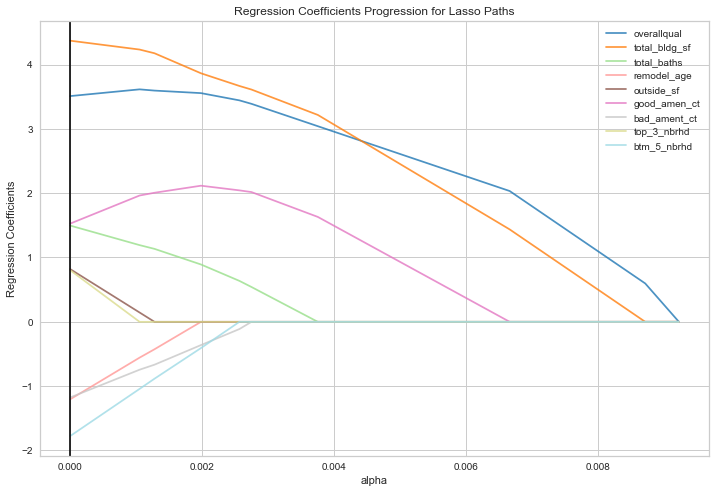

In [94]:
from sklearn import linear_model
lasso_model = linear_model.LassoLarsCV(
    cv=4, max_n_alphas=10
).fit(X_train_std, y_train_log)
fig, ax = plt.subplots(figsize=(12, 8))
cm = iter(
    plt.get_cmap("tab20")(
        np.linspace(0, 1, X_train.shape[1])
    )
)
for i in range(X.shape[1]):
    c = next(cm)
    ax.plot(
        lasso_model.alphas_,
        lasso_model.coef_path_.T[:, i],
        c=c,
        alpha=0.8,
        label=X_train.columns[i],
    )

ax.axvline(
    lasso_model.alpha_,
    linestyle="-",
    c="k",
    label="alphaCV",
)

plt.ylabel("Regression Coefficients")
ax.legend(X_train.columns, bbox_to_anchor=(1,1))
plt.xlabel("alpha")
plt.title(
    "Regression Coefficients Progression for Lasso Paths"
)
fig.savefig(
    "mlpr_lasso_w_bsmt_adj.png",
    dpi=300,
    bbox_inches="tight",
)
# indicates that total_bld_sf, total_baths, remodel_age, btm_5_nbrhd and top_5_neighborhood are the top features


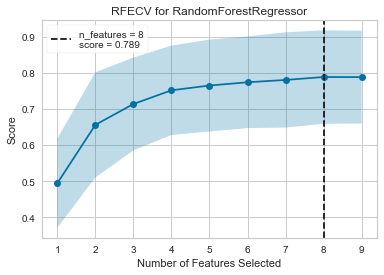

In [95]:
from yellowbrick.features import RFECV


fig, ax = plt.subplots(figsize=(6,4))
rfe = RFECV(
    rfr,
    cv=4,
)
rfe.fit(X_train, y_train)

rfe.rfe_estimator_.ranking_

rfe.rfe_estimator_.support_

rfe.poof()
fig.savefig("rfecv_for_rf_regression")

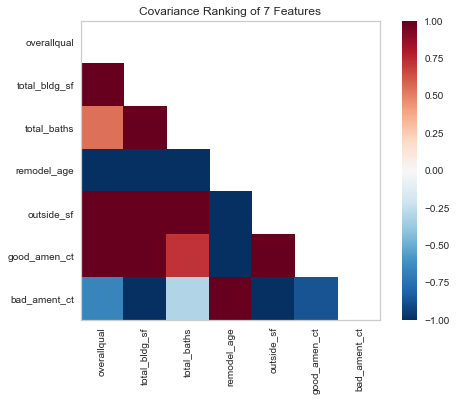

In [63]:
# visual check for covariance between features (mathematical is the VIF below)
# THIS IS A RELATIVE RANK - NOT AN ABSOLUTE METRIC
from yellowbrick.features import Rank2D

visualizer_rank_two_d = Rank2D(algorithm="covariance")

visualizer_rank_two_d.fit(X_train, y_train_log)
visualizer_rank_two_d.transform(X_train)
visualizer_rank_two_d.show()

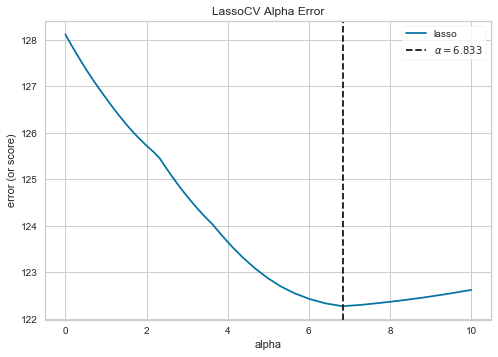

In [54]:
# toy example from website 

import numpy as np

from sklearn.linear_model import LassoCV
from yellowbrick.regressor import AlphaSelection
from yellowbrick.datasets import load_concrete

# Load the regression dataset
X, y = load_concrete()

# Create a list of alphas to cross-validate against
alphas = np.logspace(-10, 1, 400)

# Instantiate the linear model and visualizer
model = LassoCV(alphas=alphas)
visualizer = AlphaSelection(model)
visualizer.fit(X, y)
visualizer.show()

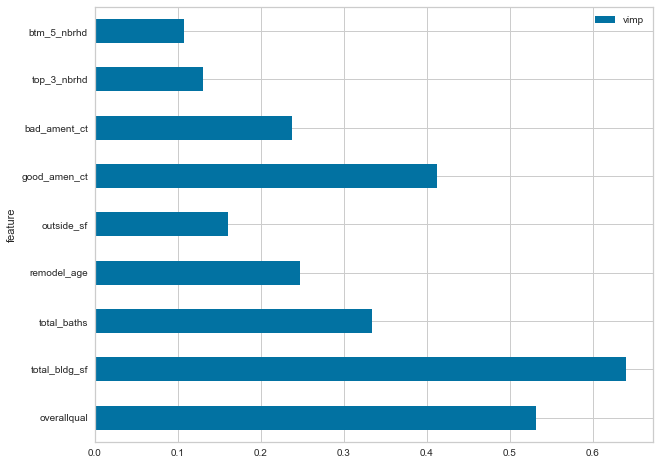

In [96]:
from sklearn import feature_selection

mic = feature_selection.mutual_info_regression(
    X_train, y_train_log
)

fig, ax = plt.subplots(figsize=(10, 8))
(
    pd.DataFrame(
        {"feature": X_train.columns, "vimp": mic}
    )
    .set_index("feature")
    .plot.barh(ax=ax)
)
fig.savefig("mutual_info_first_model_reduced.png")

In [97]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(random_state=42)
dtr.fit(X_train, y_train)
dtr.score(X_test, y_test)

0.7789636702794629

In [98]:
dtr.score(X_train, y_train)

0.9999527281535104

In [100]:
import pydotplus
from io import StringIO
from sklearn.tree import export_graphviz

dot_data = StringIO()
# export_graphviz(
#     dtr,
#     out_file=dot_data,
#     feature_names=X_train.columns,
#     filled=True,
# )
# g = pydotplus.graph_from_dot_data(
#     dot_data.getvalue()
# )
# g.write_png("decision_tree_visual.png")

In [101]:
dot_data = StringIO()
export_graphviz(
    dtr,
    max_depth=2,
    out_file=dot_data,
    feature_names=X_train.columns,
    filled=True,
)
g = pydotplus.graph_from_dot_data(
    dot_data.getvalue()
)
g.write_png("dt_readable_w_bsmt_adj.png")

True

In [102]:
for col, val in sorted(
    zip(
        X_train.columns, dtr.feature_importances_
    ),
    key=lambda x: x[1],
    reverse=True,
):
    print(f"{col:10}{val:10.3f}")

overallqual     0.501
total_bldg_sf     0.313
total_baths     0.061
good_amen_ct     0.038
remodel_age     0.035
outside_sf     0.022
top_3_nbrhd     0.016
btm_5_nbrhd     0.010
bad_ament_ct     0.004


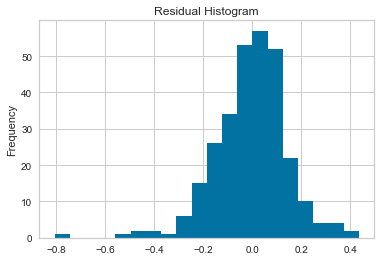

In [53]:
# Normal Residuals
fig, ax = plt.subplots(figsize=(6, 4))
resids = y_test_log - lr_log.predict(X_test)
pd.Series(resids, name="residuals").plot.hist(
    bins=20, ax=ax, title="Residual Histogram"
)
fig.savefig("residual_hist_reduced.png", dpi=300)

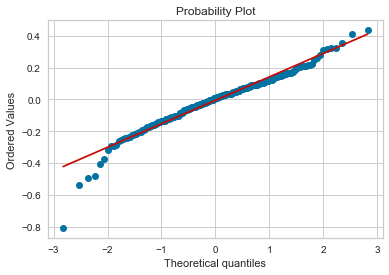

In [54]:
from scipy import stats
fig, ax = plt.subplots(figsize=(6,4))
_ = stats.probplot(resids, plot=ax)
fig.savefig("qq_plot_reduced", dpi=300)

In [104]:
import shap
shap.initjs()

exp = shap.LinearExplainer(model = lr_log, data=X_train)
vals = exp.shap_values(X_train)

In [105]:
shap.force_plot(
    exp.expected_value,
    vals[495],
    X_train.iloc[495],
)

In [106]:
shap.force_plot(
    exp.expected_value, 
    vals,
    X_train
)

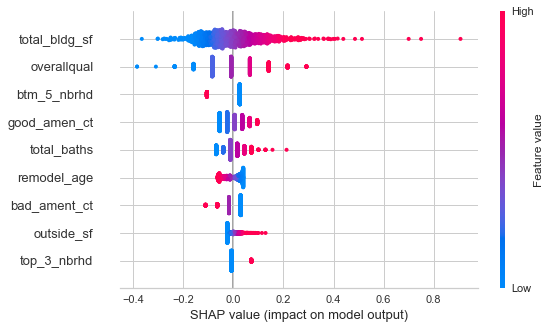

In [107]:
fig, ax = plt.subplots(figsize=(6, 4))
shap.summary_plot(vals, X_train)
fig.savefig(
    "shap_summary_plt_reduced.png",
    bbox_inches="tight",
    dpi=300,
)

In [59]:
resids.shape

(292,)

<StemContainer object of 3 artists>

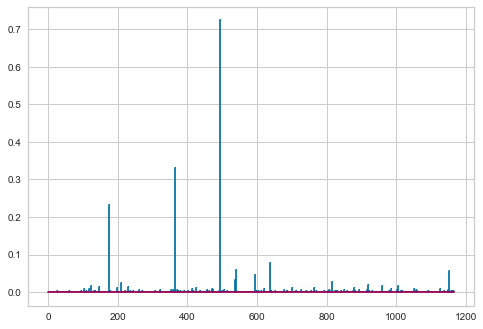

In [108]:
influence = ans.get_influence()
# c is the distance and p is p-value
(c, p) = influence.cooks_distance
plt.stem(np.arange(len(c)), c, markerfmt=",")

In [61]:
c, p = influence.cooks_distance

In [62]:
c.shape

(1168,)

In [63]:
np.argmax(c)

495

In [64]:
lr_log.predict(X=X_train)

array([11.82336958, 12.02711913, 11.45661691, ..., 11.63375304,
       12.1112609 , 12.27067298])

In [65]:
test_residuals = y_test_log - lr_log.predict(X=X_train)

ValueError: operands could not be broadcast together with shapes (292,) (1168,) 

In [66]:
X_train.iloc[495:496, ]

overallqual  total_bldg_sf  total_baths  remodel_age  outside_sf  \
Id                                                                       
1299           10           8142          4.5            0         506   

      good_amen_ct  bad_ament_ct  
Id                                
1299             5             1

In [67]:
y_train_log.iloc[495]

11.982929094215963

In [68]:
lr_log.predict(X=X_train[495:496])

array([13.53802952])

In [69]:
np.log(160000)

11.982929094215963

In [70]:
cleaned_df.iloc[1298:1299, ]

mssubclass mszoning  lotfrontage  lotarea alley lotshape neighborhood  \
Id                                                                            
1299          60       RL        313.0    63887   NaN      IR3      Edwards   

     condition1 condition2 bldgtype  ... fireplacequ  wooddecksf  openporchsf  \
Id                                   ...                                        
1299      Feedr       Norm     1Fam  ...          Gd         214          292   

      enclosedporch  3ssnporch screenporch yrsold saletype  salecondition  \
Id                                                                          
1299              0          0           0   2008      New        Partial   

     saleprice  
Id              
1299    160000  

[1 rows x 54 columns]

In [71]:
cleaned_df.iloc[1298, ]

mssubclass            60
mszoning              RL
lotfrontage          313
lotarea            63887
alley                NaN
lotshape             IR3
neighborhood     Edwards
condition1         Feedr
condition2          Norm
bldgtype            1Fam
housestyle        2Story
overallqual           10
overallcond            5
yearbuilt           2008
yearremodadd        2008
exterior1st       Stucco
exterior2nd       Stucco
masvnrtype         Stone
masvnrarea           796
bsmtqual              Ex
bsmtcond              TA
bsmtexposure          Gd
bsmtfintype1         GLQ
bsmtfinsf1          5644
bsmtfintype2         Unf
bsmtfinsf2             0
bsmtunfsf            466
totalbsmtsf         2500
heatingqc             Ex
centralair             Y
electrical         SBrkr
1stflrsf            4692
2ndflrsf             950
lowqualfinsf           0
grlivarea           5642
bsmtfullbath           2
bsmthalfbath           0
fullbath               2
halfbath               1
bedroomabvgr           3


In [109]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [110]:
features_vif = "+".join(X_train.columns)

features_target = pd.concat([X_train, y_train_log], axis="columns")

y, X = dmatrices('saleprice ~' + features_vif, features_target, return_type = "dataframe")

In [111]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

In [112]:
vif.round(1)

VIF Factor       features
0        57.6      Intercept
1         2.9    overallqual
2         2.4  total_bldg_sf
3         1.8    total_baths
4         1.8    remodel_age
5         1.3     outside_sf
6         3.1   good_amen_ct
7         1.6   bad_ament_ct
8         1.4    top_3_nbrhd
9         1.2    btm_5_nbrhd